In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.metrics import mean_absolute_percentage_error,r2_score
from sklearn.model_selection import validation_curve, cross_val_score
from scipy import stats

In [5]:
df=pd.read_csv('Airsat21.csv') 
df.head()

,id,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,...,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [6]:
df.dtypes

id                                     int64
Gender                                object
Customer_Type                         object
Age                                    int64
Type_of_Travel                        object
Class                                 object
Flight_Distance                        int64
Inflight_wifi_service                  int64
Departure/Arrival_time_convenient      int64
Ease_of_Online_booking                 int64
Gate_location                          int64
Food_and_drink                         int64
Online_boarding                        int64
Seat_comfort                           int64
Inflight_entertainment                 int64
On-board_service                       int64
Leg_room_service                       int64
Baggage_handling                       int64
Checkin_service                        int64
Inflight_service                       int64
Cleanliness                            int64
Departure_Delay_in_Minutes             int64
Arrival_De

In [8]:
df.columns

Index(['id', 'Gender', 'Customer_Type', 'Age', 'Type_of_Travel', 'Class',
       'Flight_Distance', 'Inflight_wifi_service',
       'Departure/Arrival_time_convenient', 'Ease_of_Online_booking',
       'Gate_location', 'Food_and_drink', 'Online_boarding', 'Seat_comfort',
       'Inflight_entertainment', 'On-board_service', 'Leg_room_service',
       'Baggage_handling', 'Checkin_service', 'Inflight_service',
       'Cleanliness', 'Departure_Delay_in_Minutes', 'Arrival_Delay_in_Minutes',
       'satisfaction'],
      dtype='object')

In [10]:
df.describe()

,id,Age,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,Food_and_drink,Online_boarding,Seat_comfort,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes
count,8813.000000,8813.000000,8813.000000,8813.000000,8813.000000,8813.000000,8813.000000,8813.000000,8813.000000,8813.000000,8813.000000,8813.000000,8813.000000,8813.000000,8813.000000,8813.000000,8813.000000,8813.000000,8793.000000
mean,64909.453421,39.349824,1198.719732,2.732668,3.034835,2.754908,2.966186,3.202996,3.245092,3.404176,3.328946,3.361171,3.348009,3.615228,3.285260,3.625780,3.261092,14.811755,15.229728
std,37363.570738,15.125359,1002.278467,1.326181,1.523991,1.401340,1.281167,1.338942,1.348517,1.326445,1.339770,1.290675,1.311099,1.189311,1.272855,1.180865,1.318718,38.643242,39.026924
min,8.000000,7.000000,31.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32450.000000,27.000000,411.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,0.000000,0.000000
50%,64666.000000,40.000000,853.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,97335.000000,51.000000,1750.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,13.000000,14.000000
max,129863.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1305.000000,1280.000000


In [22]:
df.Gender.value_counts()

Female    4495
Male      4318
Name: Gender, dtype: int64

In [20]:
df.Type_of_Travel.value_counts()

Business travel    6121
Personal Travel    2692
Name: Type_of_Travel, dtype: int64

In [21]:
df.Class.value_counts()

Business    4261
Eco         3917
Eco Plus     635
Name: Class, dtype: int64

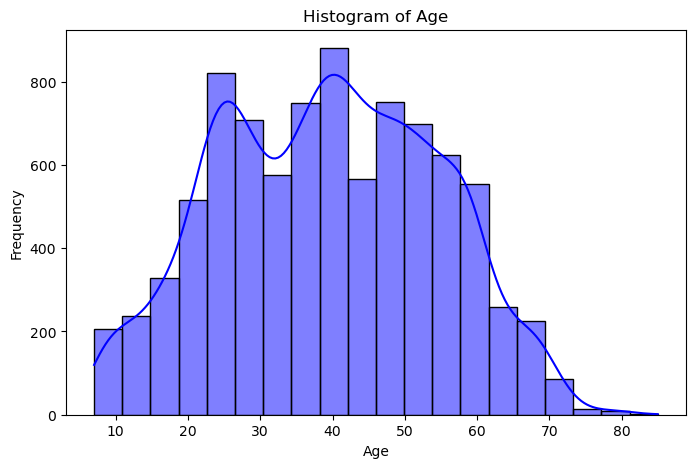

In [19]:
plt.figure(figsize=(8,5)) # univariate histogram
sns.histplot(df['Age'], bins=20, kde=True, color='b')
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()  # Shows age group of travellers

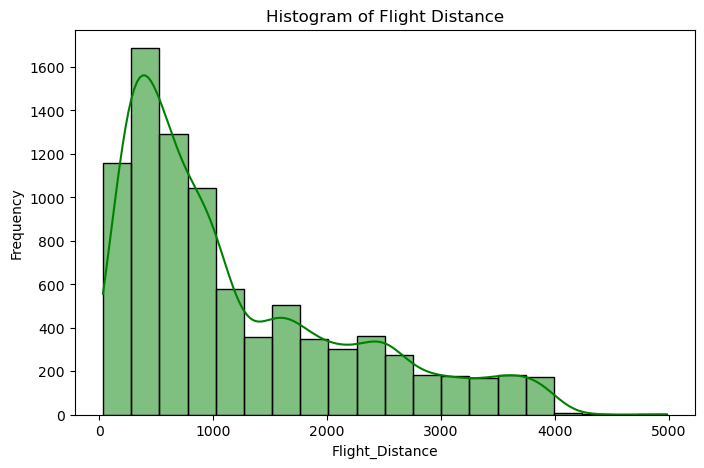

In [18]:
plt.figure(figsize=(8,5))
sns.histplot(df['Flight_Distance'], bins=20, kde=True, color='g')
plt.title('Histogram of Flight Distance')
plt.xlabel('Flight_Distance')
plt.ylabel('Frequency')
plt.show()

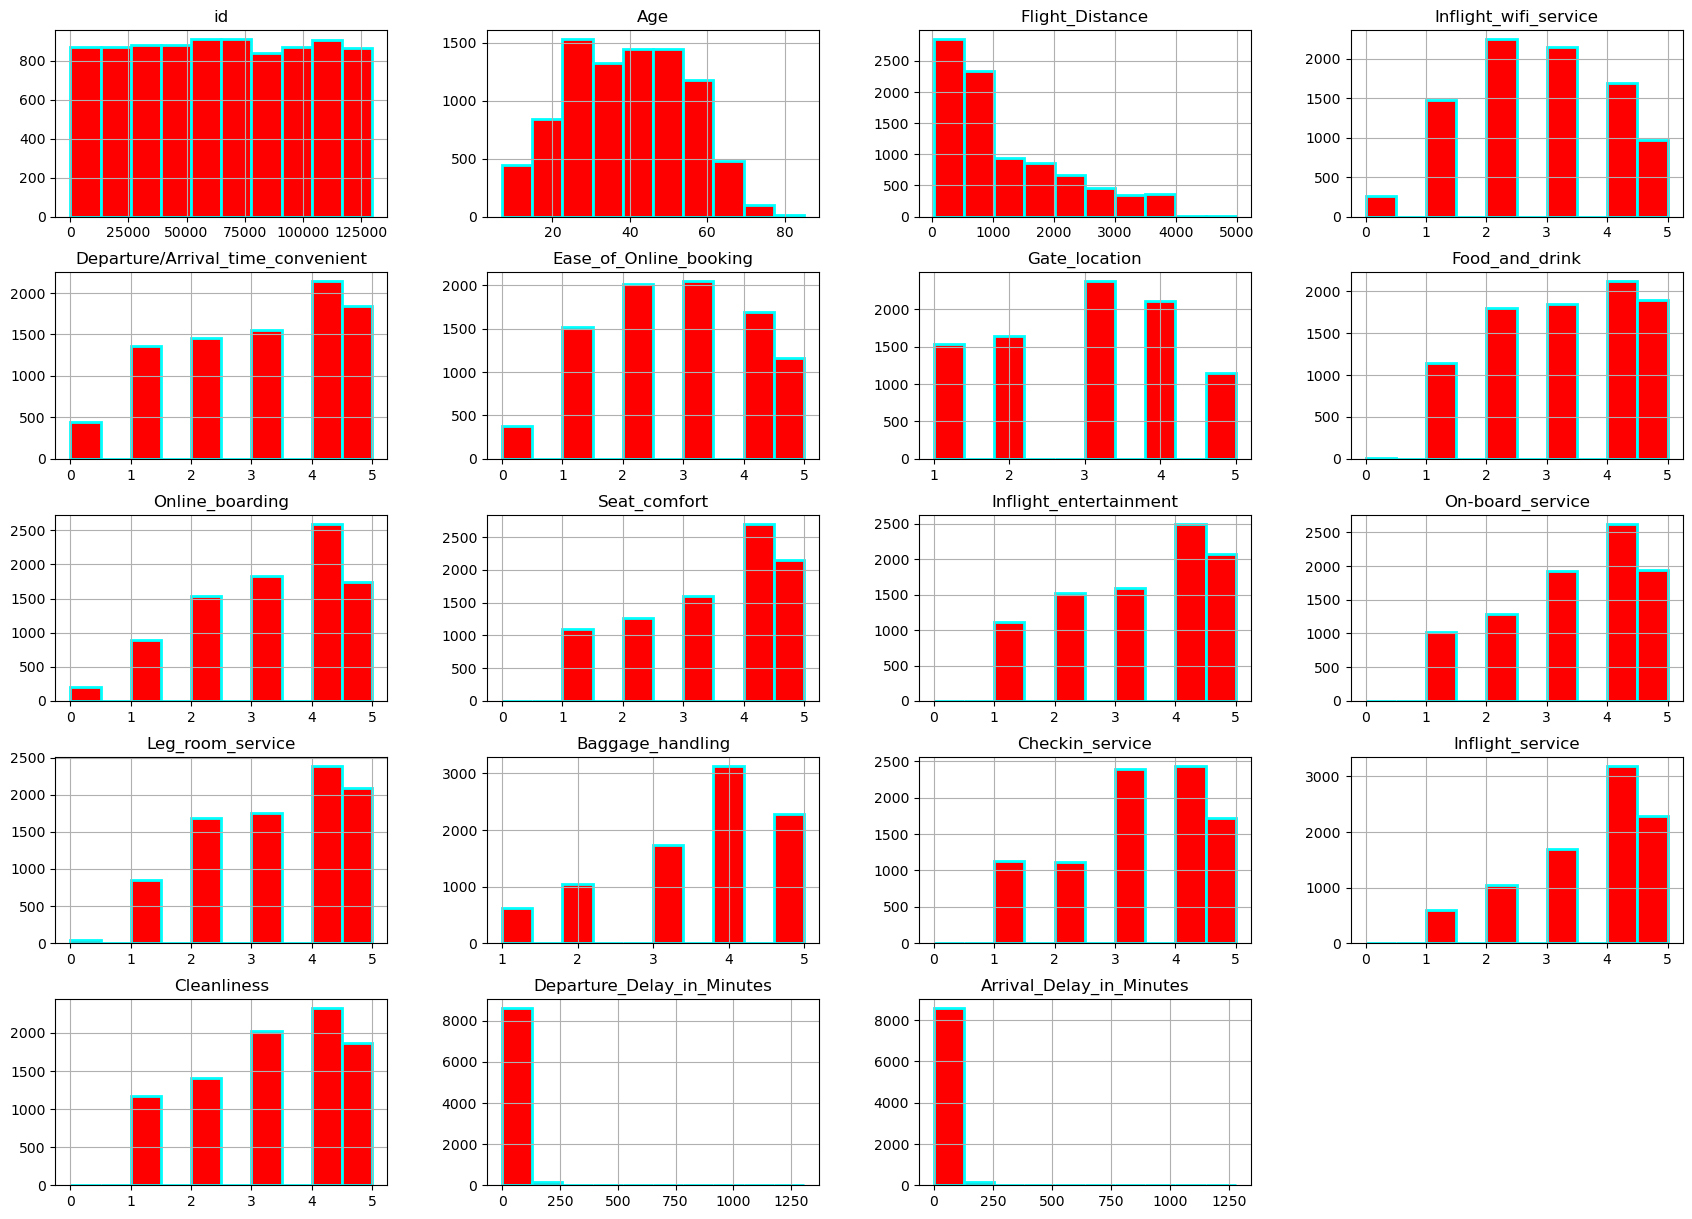

In [17]:
df.hist(edgecolor='cyan',linewidth=2, color='r') # histograms for the data available in the dataset
fig=plt.gcf()
fig.set_size_inches(21,15)
plt.show()

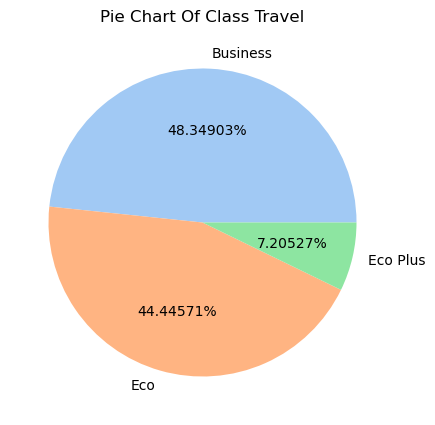

In [25]:
# pie chart
plt.figure(figsize=(8,5))
df['Class'].value_counts().plot(kind='pie',autopct='%1.5f%%',colors=sns.color_palette('pastel'))
plt.title('Pie Chart Of Class Travel')
plt.ylabel('')
plt.show()

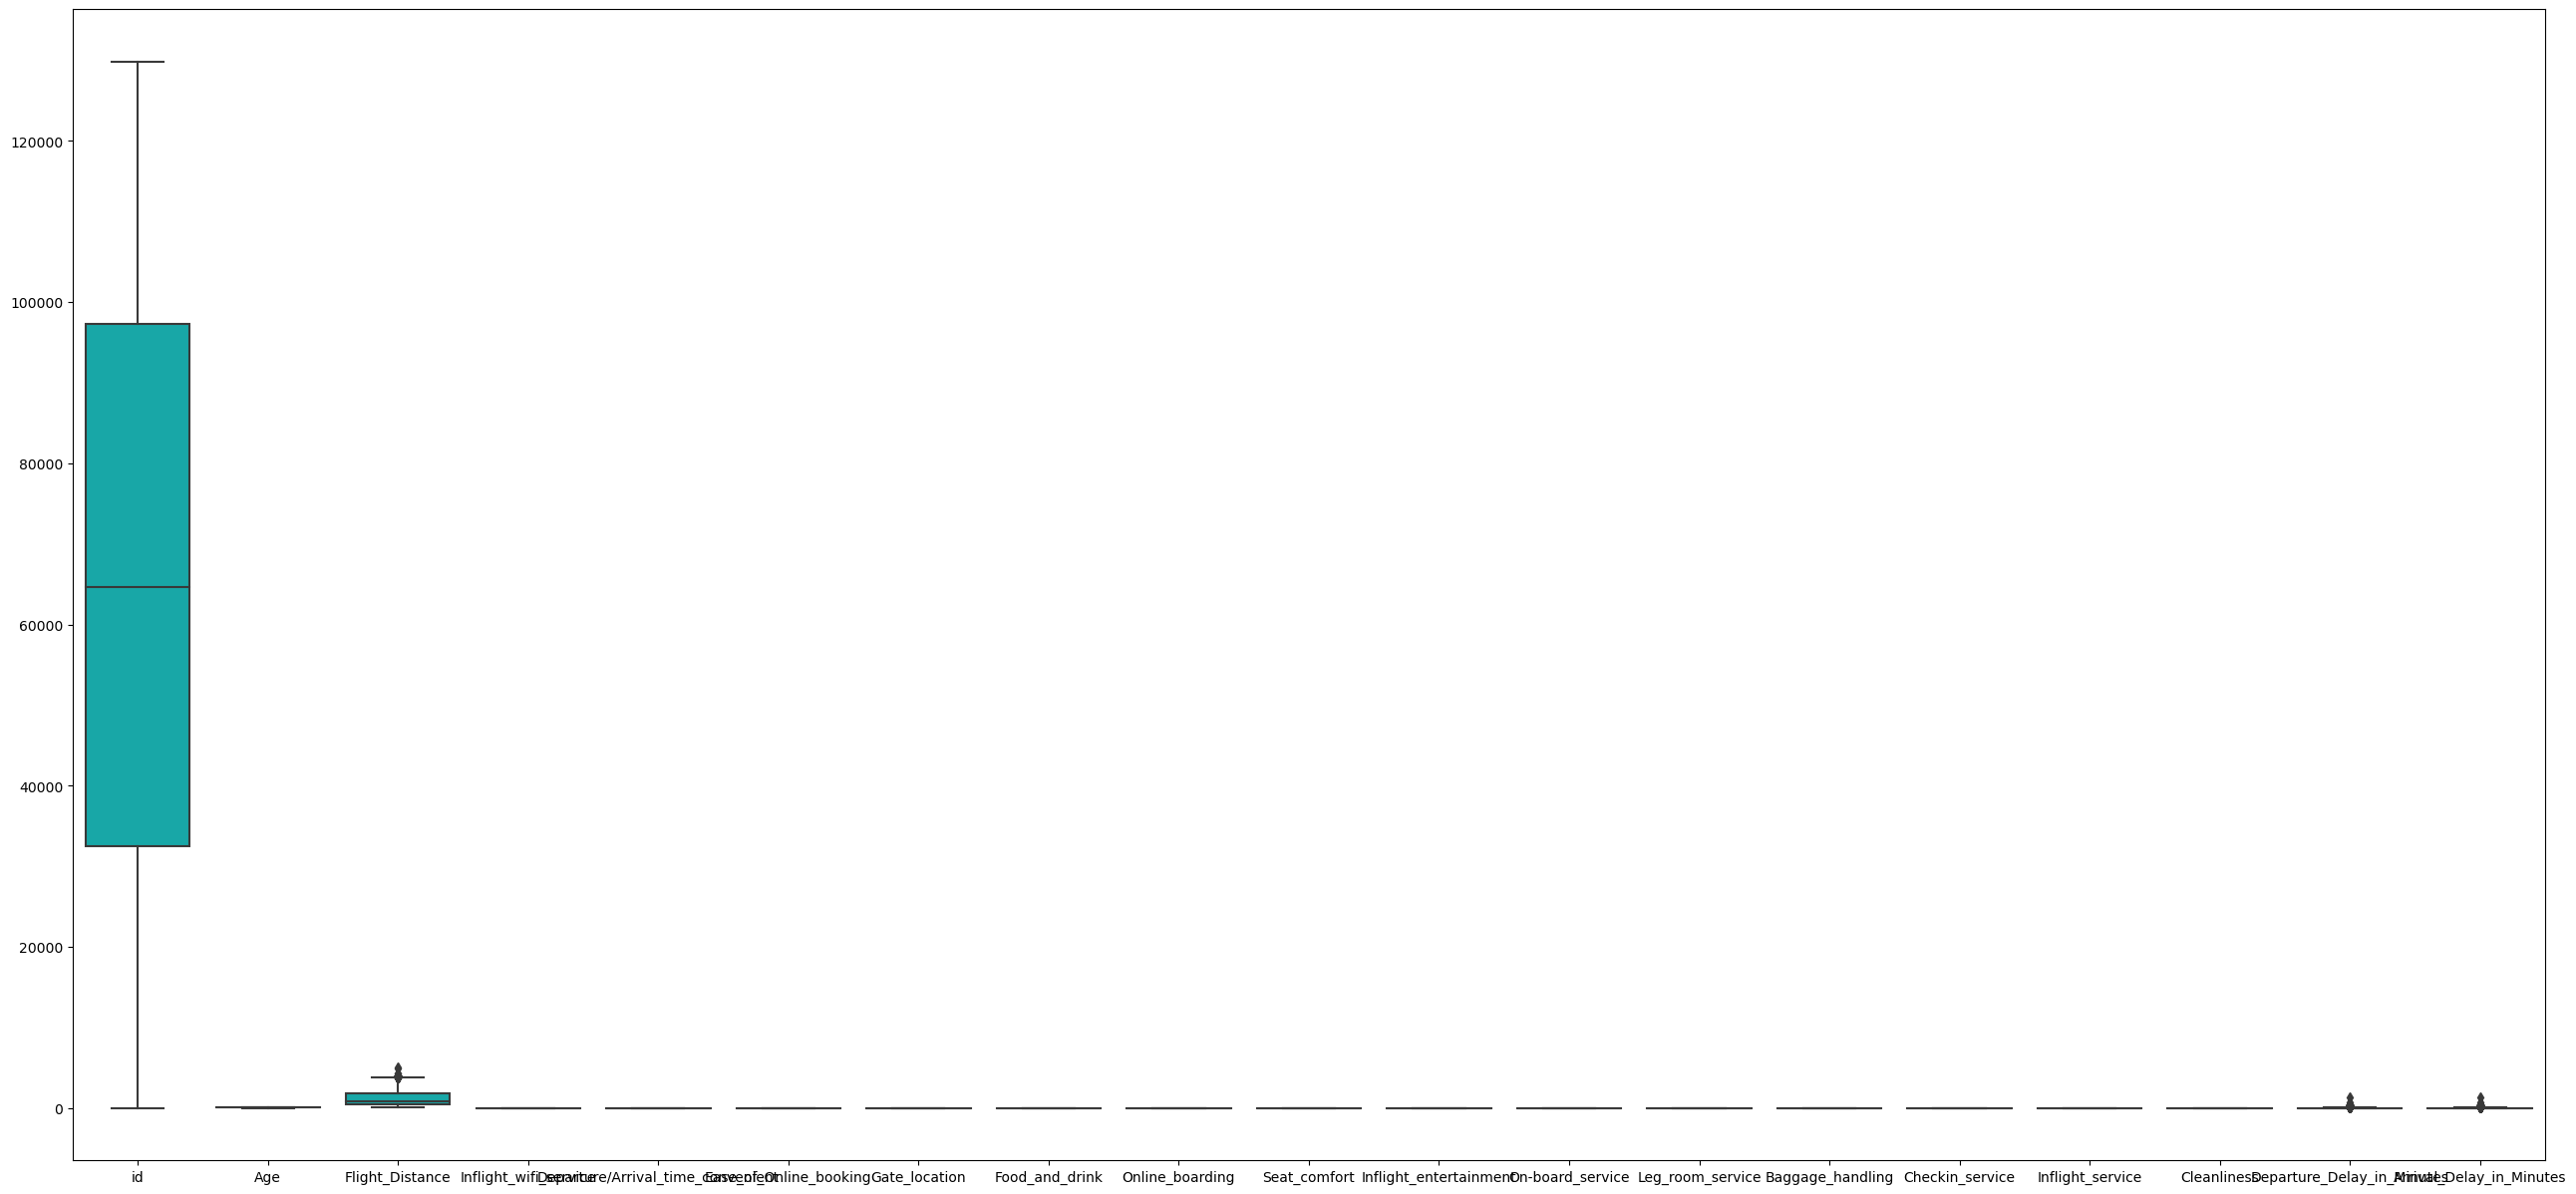

In [34]:
plt.figure(figsize=(32,15) ) # univariate box plot
sns.boxplot(df,color='c')
plt.show()

<Axes: xlabel='Arrival_Delay_in_Minutes'>

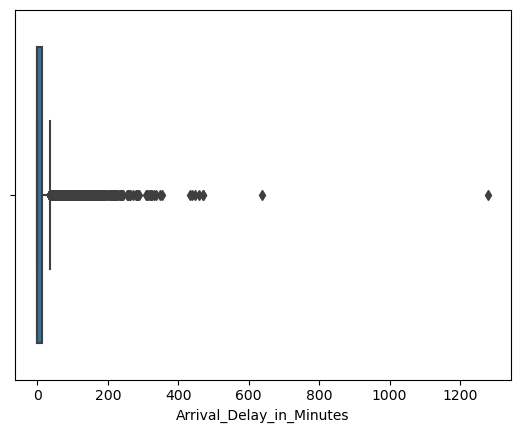

In [51]:
sns.boxplot(x=df['Arrival_Delay_in_Minutes'])

<Axes: xlabel='Age', ylabel='Flight_Distance'>

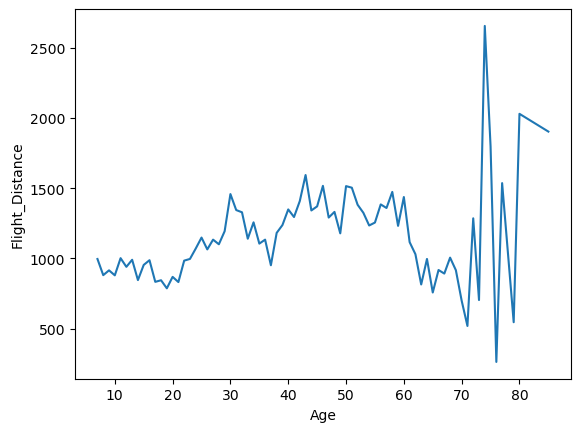

In [37]:
sns.lineplot(x='Age',y='Flight_Distance',data=df, errorbar=None) # shows the relation between age and distance

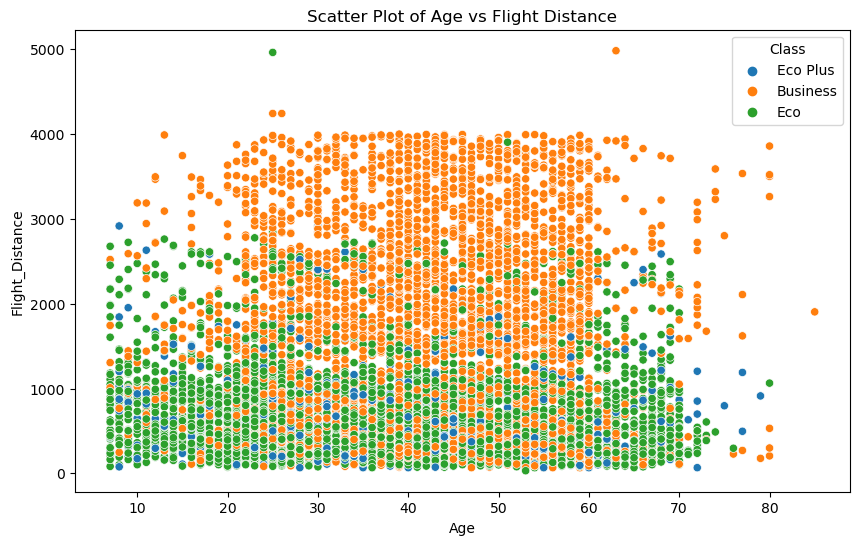

In [38]:
# Bivariate Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Flight_Distance', hue='Class', data=df)
plt.title('Scatter Plot of Age vs Flight Distance')
plt.xlabel('Age')
plt.ylabel('Flight_Distance')
plt.legend(title='Class')
plt.show()

PRE-PROCESSING

In [52]:
df= df.drop(columns=['id','Inflight_wifi_service','Ease_of_Online_booking','Gate_location','Food_and_drink','Online_boarding',
                       'Seat_comfort','Inflight_entertainment','On-board_service','Leg_room_service','Baggage_handling','Checkin_service','Inflight_service','Cleanliness'])
df    # dropping some non-required columns                   

,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Departure/Arrival_time_convenient,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,4,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,2,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,5,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...
8808,Female,Loyal Customer,25,Business travel,Business,3716,5,0,0.0,satisfied
8809,Male,Loyal Customer,25,Personal Travel,Eco,311,4,0,10.0,neutral or dissatisfied
8810,Female,Loyal Customer,25,Business travel,Eco,646,3,5,0.0,satisfied
8811,Female,Loyal Customer,42,Business travel,Business,3512,3,21,11.0,satisfied


In [53]:
df.shape

(8813, 10)

In [54]:
df=df.dropna() 
df.shape

(8793, 10)

In [55]:
df_num = df.select_dtypes(include='number')
df_num.head() 

,Age,Flight_Distance,Departure/Arrival_time_convenient,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes
0,13,460,4,25,18.0
1,25,235,2,1,6.0
2,26,1142,2,0,0.0
3,25,562,5,11,9.0
4,61,214,3,0,0.0


In [56]:
# Outlier Filter
Q1= df_num.quantile(0.25)
Q3= df_num.quantile(0.75)
IQR=Q3-Q1
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR

In [57]:
df = df[~((df_num < lower_bound) | (df_num > upper_bound)).any(axis=1)] # removing the outliers

<Axes: xlabel='Arrival_Delay_in_Minutes'>

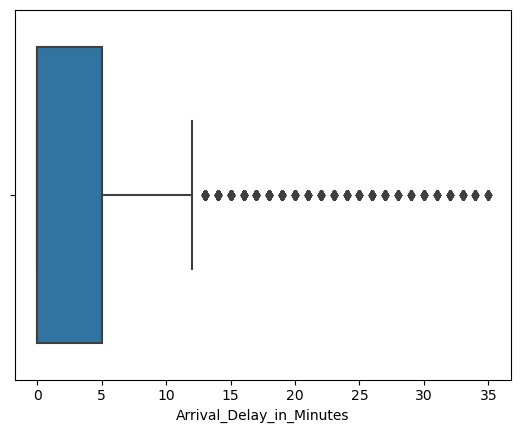

In [58]:
sns.boxplot(x=df['Arrival_Delay_in_Minutes'])

In [82]:
X = df.drop('Flight_Distance', axis=1)
y = df.Flight_Distance
X.head() 

,Gender,Customer_Type,Age,Type_of_Travel,Class,Departure/Arrival_time_convenient,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,4,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,2,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,2,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,5,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,3,0,0.0,satisfied


In [83]:
X_num = X.select_dtypes('number')
X_num.head()

,Age,Departure/Arrival_time_convenient,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes
0,13,4,25,18.0
1,25,2,1,6.0
2,26,2,0,0.0
3,25,5,11,9.0
4,61,3,0,0.0


In [84]:
X_cat = X.select_dtypes('object')
X_cat.head()

,Gender,Customer_Type,Type_of_Travel,Class,satisfaction
0,Male,Loyal Customer,Personal Travel,Eco Plus,neutral or dissatisfied
1,Male,disloyal Customer,Business travel,Business,neutral or dissatisfied
2,Female,Loyal Customer,Business travel,Business,satisfied
3,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied
4,Male,Loyal Customer,Business travel,Business,satisfied


In [85]:
scaler = MinMaxScaler()
X_num_scaled = scaler.fit_transform(X_num)

In [86]:
X_num_scaled = pd.DataFrame(X_num_scaled, columns=X_num.columns, index=X_num.index) 

In [87]:
X_num_scaled

,Age,Departure/Arrival_time_convenient,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes
0,0.076923,0.8,0.78125,0.514286
1,0.230769,0.4,0.03125,0.171429
2,0.243590,0.4,0.00000,0.000000
3,0.230769,1.0,0.34375,0.257143
4,0.692308,0.6,0.00000,0.000000
...,...,...,...,...
8806,0.038462,0.6,0.18750,0.085714
8808,0.230769,1.0,0.00000,0.000000
8809,0.230769,0.8,0.00000,0.285714
8810,0.230769,0.6,0.15625,0.000000


In [66]:
X_cat_encoded = pd.get_dummies(X_cat, drop_first=False, dtype=int)

In [67]:
X_cat_encoded.describe()

,Gender_Female,Gender_Male,Customer_Type_Loyal Customer,Customer_Type_disloyal Customer,Type_of_Travel_Business travel,Type_of_Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus,satisfaction_neutral or dissatisfied,satisfaction_satisfied
count,7321.000000,7321.000000,7321.000000,7321.000000,7321.000000,7321.000000,7321.000000,7321.000000,7321.000000,7321.000000,7321.000000
mean,0.510723,0.489277,0.816555,0.183445,0.686245,0.313755,0.476028,0.451031,0.072941,0.565633,0.434367
std,0.499919,0.499919,0.387057,0.387057,0.464050,0.464050,0.499459,0.497630,0.260057,0.495707,0.495707
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [88]:
X = pd.concat([X_num_scaled, X_cat_encoded], axis=1)

In [89]:
X.shape, X_num_scaled.shape, X_cat_encoded.shape

((7321, 15), (7321, 4), (7321, 11))

In [70]:
print(X.isnull().sum()) 
print(y.isnull().sum())
print(X.shape)
print(y.shape)

Age                                     0
Flight_Distance                         0
Departure/Arrival_time_convenient       0
Departure_Delay_in_Minutes              0
Gender_Female                           0
Gender_Male                             0
Customer_Type_Loyal Customer            0
Customer_Type_disloyal Customer         0
Type_of_Travel_Business travel          0
Type_of_Travel_Personal Travel          0
Class_Business                          0
Class_Eco                               0
Class_Eco Plus                          0
satisfaction_neutral or dissatisfied    0
satisfaction_satisfied                  0
dtype: int64
0
(7321, 15)
(7321,)


In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=27)
print("X train:",X_train.shape)
print("X test:",X_test.shape)
print("Y train:",y_train.shape) 
print("Y test:",y_test.shape)

X train: (5124, 15)
X test: (2197, 15)
Y train: (5124,)
Y test: (2197,)


We are ready to fit ML Models to train and evaluate using test

In [91]:
from sklearn.preprocessing import StandardScaler
SC=StandardScaler()
X=SC.fit_transform(X)

In [92]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import mean_absolute_percentage_error 
from math import sqrt

In [93]:
k_values = np.arange(1,11,2)
train_mape_scores = []
test_mape_scores = []

In [94]:
for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    train_pred = knn.predict(X_train)
    test_pred = knn.predict(X_test)
    
    train_mape = mean_absolute_percentage_error(y_train, train_pred)
    test_mape = mean_absolute_percentage_error(y_test, test_pred)
    
    train_mape_scores.append(train_mape)
    test_mape_scores.append(test_mape)

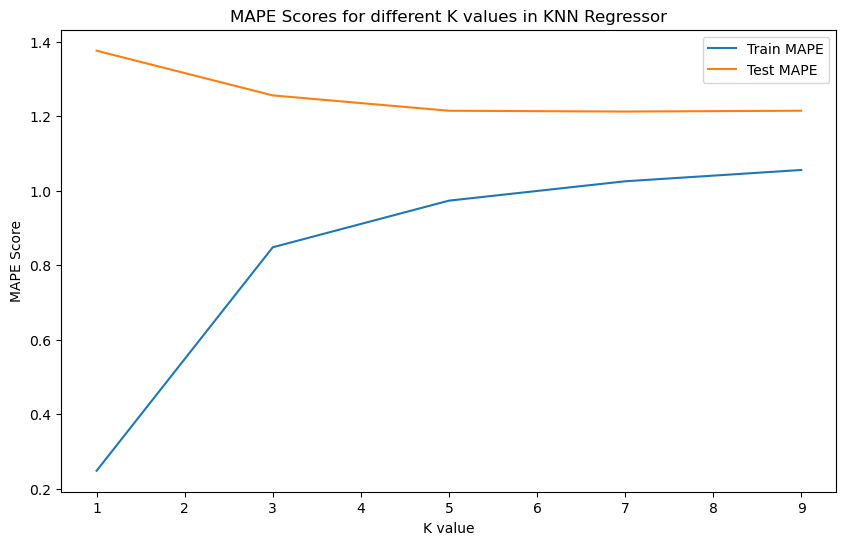

In [95]:
plt.figure(figsize=(10, 6))
plt.plot(k_values, train_mape_scores, marker='', label='Train MAPE')
plt.plot(k_values, test_mape_scores, marker='', label='Test MAPE')
plt.xlabel('K value')
plt.ylabel('MAPE Score')
plt.title('MAPE Scores for different K values in KNN Regressor')
plt.legend()
plt.show()

In [96]:
# Train the model with different K values and calculate MAPE scores using CV
k_values = np.arange(1, 11, 2)
cv_mape_scores = []
train_mape_scores = []
test_mape_scores = []

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    
    # Calculate CV MAPE using cross-validation (CV) with full X and y
    cv_scores = -cross_val_score(knn, X, y, cv=5, scoring='neg_mean_absolute_percentage_error')
    cv_mape = np.mean(cv_scores)
    cv_mape_scores.append(cv_mape)
    
    # Train the model on the full training set and calculate train MAPE
    knn.fit(X_train, y_train)
    train_pred = knn.predict(X_train)
    train_mape = mean_absolute_percentage_error(y_train, train_pred)
    train_mape_scores.append(train_mape)
    
    # Calculate test MAPE
    test_pred = knn.predict(X_test)
    test_mape = mean_absolute_percentage_error(y_test, test_pred)
    test_mape_scores.append(test_mape)

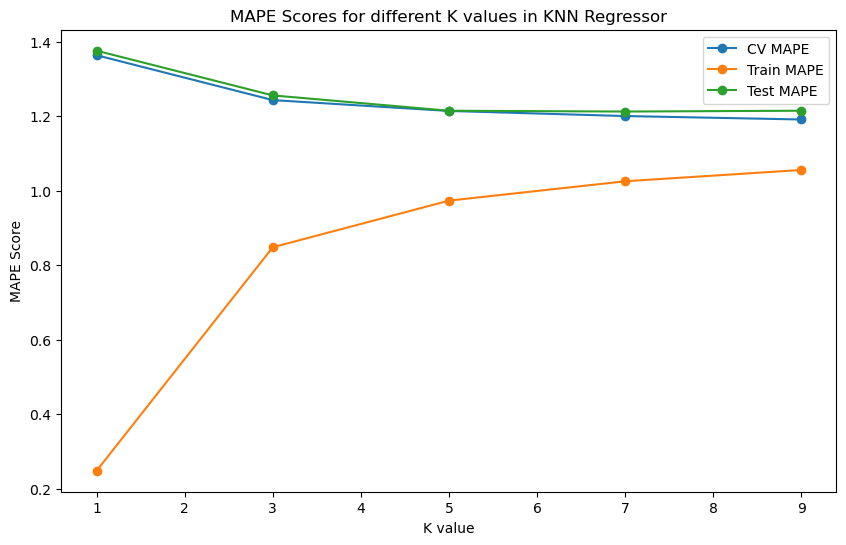

The best K value for CV is 9.


In [97]:
# Plot CV MAPE, Train MAPE, and Test MAPE for different K values
plt.figure(figsize=(10, 6))
plt.plot(k_values, cv_mape_scores, marker='o', label='CV MAPE')
plt.plot(k_values, train_mape_scores, marker='o', label='Train MAPE')
plt.plot(k_values, test_mape_scores, marker='o', label='Test MAPE')
plt.xlabel('K value')
plt.ylabel('MAPE Score')
plt.title('MAPE Scores for different K values in KNN Regressor')
plt.legend()
plt.show()

# Compare the best K value for CV
best_k_cv = k_values[np.argmin(cv_mape_scores)]
print(f"The best K value for CV is {best_k_cv}.")